In [90]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import solve_ivp

In [91]:
class formation():
    # n : number of agents (n >2) 
    # L : Sensing Graph Input
    # H : Communication Graph input 
    # D : Stabilization matrix input 
    
    def __init__(self,n,L,H,D):
        self.n = n
        self.L = L
        self.H = H
        self.D = D
        
        Hcomp = np.zeros((n,n))
        Hcomp[0:2,0:2]= np.identity(2)
        Hbar = Hcomp + H
        
        self.Hbar = Hbar
        
        # For formation control law
        eta = np.zeros((np.shape(L)[0]))
        for i in range(0,np.shape(L)[0]):
            if i>=2:
                eta[i] = 0
            elif i<2:
                eta[i] = 1
                
        self.eta = eta

In [92]:
#Single integrator kinematics fomration control
def single_kinematics(formation,sim_params,Leader_v0):
    
    #formation params
    D =formation.D
    L =formation.L
    Hbar =formation.Hbar
    eta = formation.eta 
    
    #simulation params 
    tsim =sim_params.tsim
    z_init = sim_params.z_init
    
    def formation_SIK(t,z):      
        dzdt = np.matmul(np.linalg.inv(Hbar),(-np.matmul(np.matmul(D,L),z)+np.multiply(eta,Leader_v0(t))))       
        return dzdt
    
    sol = solve_ivp(formation_SIK,[tsim[0], tsim[-1]],z_init,t_eval=tsim)

    return sol

In [93]:
#Plotting functions
def pentagon_plot(sol,plt,n,t,linecolor):
    
    if np.shape(sol.y)[0]==2*n:
        k=2
    elif np.shape(sol.y)[0]==n:
        k=1
    
    for i in range(0,k*n,k):
        if i == 0 :
            plt.plot(sol.y[i][t].real,sol.y[i][t].imag,'rs')
        elif i == 1*k:
            plt.plot(sol.y[i][t].real,sol.y[i][t].imag,'ms')
        else:
            plt.plot(sol.y[i][t].real,sol.y[i][t].imag,'b*')    
    
    plt.plot([sol.y[0][t].real,sol.y[1*k][t].real],[sol.y[0][t].imag,sol.y[1*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[0][t].real,sol.y[2*k][t].real],[sol.y[0][t].imag,sol.y[2*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[0][t].real,sol.y[3*k][t].real],[sol.y[0][t].imag,sol.y[3*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[0][t].real,sol.y[4*k][t].real],[sol.y[0][t].imag,sol.y[4*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[0][t].real,sol.y[5*k][t].real],[sol.y[0][t].imag,sol.y[5*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[1*k][t].real,sol.y[2*k][t].real],[sol.y[1*k][t].imag,sol.y[2*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[1*k][t].real,sol.y[5*k][t].real],[sol.y[1*k][t].imag,sol.y[5*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[2*k][t].real,sol.y[3*k][t].real],[sol.y[2*k][t].imag,sol.y[3*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[3*k][t].real,sol.y[4*k][t].real],[sol.y[3*k][t].imag,sol.y[4*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[4*k][t].real,sol.y[5*k][t].real],[sol.y[4*k][t].imag,sol.y[5*k][t].imag],'-',color=linecolor)
    
    plt.xlabel("Real Axis (X coordinate)")
    plt.ylabel("Imaginary Axis (Y coordinate)")
    
    return plt

def plot_trajectories(sol,plt,n):
    if np.shape(sol.y)[0]==2*n:
        k=2
    elif np.shape(sol.y)[0]==n:
        k=1
    for i in range(0,k*n,k):
        if i == 0 :
            loop_label = "Agent " + str((int)(i/k)+1) + " Co-Leader"
            plt.plot(sol.y[i].real,sol.y[i].imag,'r-',label= loop_label)
            plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'rs')
            plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'rs')
        elif i == 1*k:
            loop_label = "Agent " + str((int)(i/k)+1) + " Co-Leader"
            plt.plot(sol.y[i].real,sol.y[i].imag,'m-',label= loop_label)
            plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'ms')
            plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'ms')
        else:
            loop_label = "Agent " + str((int)(i/k)+1) + " Follower"
            plt.plot(sol.y[i].real,sol.y[i].imag,label= loop_label)
            plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'b*')
            plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'b*')
    
    plt.title("Single Integrater Formation Control")
    plt.xlabel("Real Axis (X coordinate)")
    plt.ylabel("Imaginary Axis (Y coordinate)")
    plt.legend(loc='best')
    
    return plt

In [94]:
#Pentagon Formation

# Number of agents
n= 6

# Sensing graph input
L = np.array([[0,0,0,0,0,0],
              [0,0,0,0,0,0],
              [-1j,0.8-0.4j,1-(0.8-0.4j)+1j,-1,0,0],
              [-2j,0,1j,2j-1j-(3j/2),3j/2,0],
              [-2j,0,0,(1+2j),-(0.8+0.4j)-(1+2j)+2j,0.8+0.4j],
              [1j,1,0,0,-0.6+0.2j,-1j-1-(-0.6+0.2j)]
             ],dtype=complex)

# Communication graph input
H = np.array([[0,0,0,0,0,0],
              [0,0,0,0,0,0],
              [-1/3,-1/3,1,-1/3,0,0],
              [-1/3,0,-1/3,1,-1/3,0],
              [-1/3,0,0,-1/3,1,-1/3],
              [-1/3,-1/3,0,0,-1/3,1],
             ],dtype=complex)

# Stabilization matrix (Important for asymtotic stability)
D =np.diag([1,1,-2j,-5*np.exp(complex(0,-np.pi/10)),-5*np.exp(complex(0,-np.pi/10)),12j])

pentagon = formation(n,L,H,D)

In [95]:
class sim_params_single_int():
    #Simulation parameters
    def __init__(self,start,stop,simstep,z_init):
        self.start=start
        self.end=stop
        self.simstep=simstep
        self.z_init = z_init 
        self.tsim = np.arange(start,end,simstep)

In [96]:
def Leader_speed(t):
    v0_real = 2*t*np.cos([0.1*t])
    v0_imag = 0.5*t*np.sin([0.1*t])
    v0 = 0.1*complex(v0_real,v0_imag)
    return v0    
   
start  = 0
end = 20
simstep =.001
z_init =  [0+1j,0+2.3j,-2.1-2.1j,-2.2+1.9j,+3-1.2j,2+3j] 

sim_params_pentagon = sim_params_single_int(start,end,simstep,z_init)

sol_kinematics =single_kinematics(pentagon,sim_params_pentagon,Leader_speed)

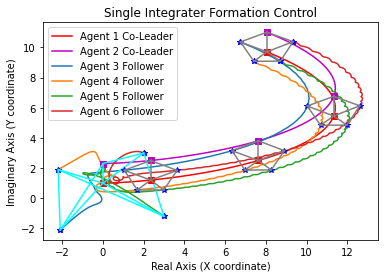

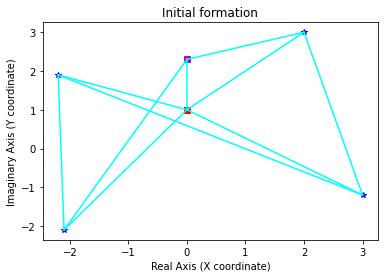

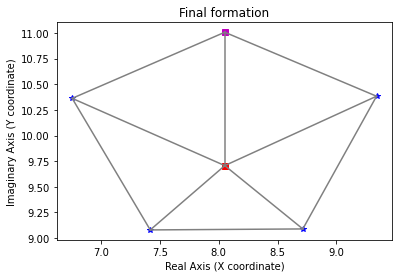

In [97]:
#Simulation Results
plt.figure(1)

plt = plot_trajectories(sol_kinematics,plt,n)
       
# Initial positions        
plt = pentagon_plot(sol_kinematics,plt,n,0,"cyan")
# Final positions
plt = pentagon_plot(sol_kinematics,plt,n,-1,"grey")

plt = pentagon_plot(sol_kinematics,plt,n,int((1/4)*(end/simstep)),"grey")
plt = pentagon_plot(sol_kinematics,plt,n,int((1/2)*(end/simstep)),"grey")
plt = pentagon_plot(sol_kinematics,plt,n,int((3/4)*(end/simstep)),"grey")

plt.show()

#Initial Formation
plt.figure()          
plt = pentagon_plot(sol_kinematics,plt,n,0,'cyan')
plt.title("Initial formation")
plt.show()

#Final Formation
plt.figure()
plt = pentagon_plot(sol_kinematics,plt,n,-1,'grey')
plt.title("Final formation")
plt.show()


In [98]:
#Calculate Inputs 
def calculate_inputs_SIK(formation,Leader_input,sol,n):
    
    for i,t in enumerate(sol.t):
        ut = np.matmul(np.linalg.inv(formation.Hbar),(-np.matmul(np.matmul(formation.D,formation.L),sol.y[:,i])+np.multiply(formation.eta,Leader_input(sol.t[i]))))
        ut = np.reshape(ut,(n,1))
        if i==0:
            inputs = ut
        else:
            inputs = np.append(inputs,ut,axis=1)
    return inputs

In [99]:
inputs = calculate_inputs_SIK(pentagon,Leader_speed,sol_kinematics,n)

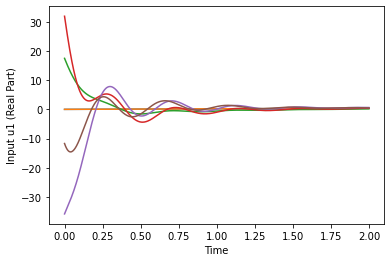

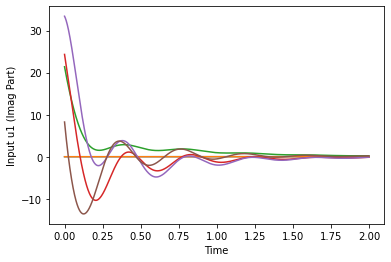

In [100]:
plt.figure()

for i in range(n):
    plt.plot(sol_kinematics.t[:2000],inputs[i][:2000].real)
    plt.xlabel("Time")
    plt.ylabel("Input u1 (Real Part)")

plt.show()

plt.figure()
for i in range(n):
    plt.plot(sol_kinematics.t[:2000],inputs[i][:2000].imag)
    plt.xlabel("Time")
    plt.ylabel("Input u1 (Imag Part)")
    
plt.show()

In [101]:
# theta_init =[0,0,0,0,0,0]
# inputs[:,0]*np.cos(theta_init)
# inputs[:,0]
# theta_init[0]

In [102]:
# Solve for Orginal inputs from u1 and u2 
r = .5
u1= inputs.real
u2 = inputs.imag

#Theta Solver
def theta_solver_SIK(t,theta,r,simstep,u1,u2):
    index= (int)(t/simstep)
    dthetadt = (u2[:,index]*np.cos(theta)-u1[:,index]*np.sin(theta))/r
    return dthetadt

theta_init =[np.pi/2,np.pi/4,np.pi/3,np.pi/4,-np.pi/2,np.pi/6]

theta = solve_ivp(theta_solver_SIK,[sol_kinematics.t[0], sol_kinematics.t[-1]],theta_init,args=(r,simstep,u1,u2),t_eval=sol_kinematics.t)

In [103]:
# def theta_solver_SIK_l(t,theta,r,simstep,Leader_speed):
#     index= (int)(t/simstep)
#     dthetadt = (Leader_speed(t).imag*np.cos(theta)-Leader_speed(t).real*np.sin(theta))/r
#     return dthetadt

# theta_leader = solve_ivp(theta_solver_SIK_l,[sol_kinematics.t[0], sol_kinematics.t[-1]],np.reshape(theta_init[0:2],(2,)),args=(r,simstep,Leader_speed),t_eval=sol_kinematics.t)

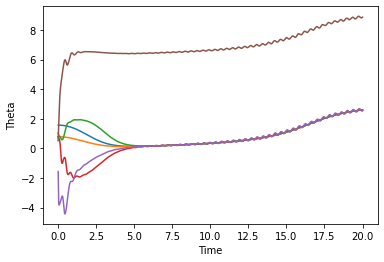

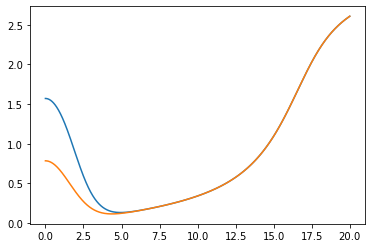

In [104]:
#Theta Plots

plt.figure()

plot_time =20000

for i in range(n):
    plt.plot(theta.t[:plot_time],(theta.y[i][:plot_time]))
    plt.xlabel("Time")
    plt.ylabel("Theta")

plt.figure()

#plt.plot(theta_leader.t[:plot_time],theta_leader.y[0][:plot_time])
plt.plot(theta.t[:plot_time],theta.y[0][:plot_time])
#plt.plot(theta_leader.t[:plot_time],theta_leader.y[1][:plot_time])
plt.plot(theta.t[:plot_time],theta.y[1][:plot_time])

plt.show()

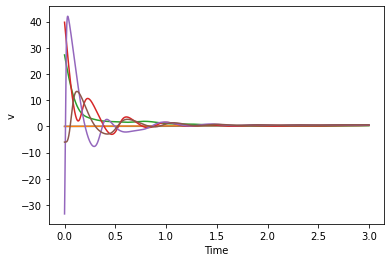

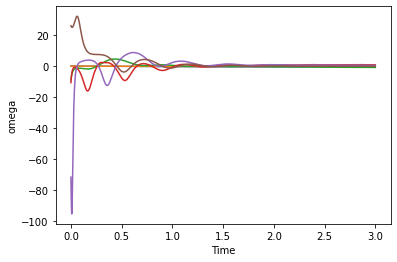

In [105]:
# Original unicycle inputs

v = np.cos(theta.y)*u1 + np.sin(theta.y)*u2
omega = (-np.sin(theta.y)*u1 + np.cos(theta.y)*u2)/r

plot_time =3000

plt.figure()

for i in range(n):
    plt.plot(theta.t[:plot_time],(v[i][:plot_time]))
    plt.xlabel("Time")
    plt.ylabel("v")
    
plt.show()

plt.figure()

for i in range(n):
    plt.plot(theta.t[:plot_time],(omega[i][:plot_time]))
    plt.xlabel("Time")
    plt.ylabel("omega")
    
plt.show()


Formation Law for Double Integrator Dynamics 

In [106]:
#Double integrator dynamics fomration control
def double_dynamics(formation,sim_params,Leader_a0):
    
    #formation params
    D =formation.D
    L =formation.L
    Hbar =formation.Hbar
    eta = formation.eta
    
    #simulation params 
    tsim = sim_params.tsim
    z_init = sim_params.z_init
    v_init =sim_params.v_init
    
    init = np.zeros(2*n,dtype=complex)
    init[::2] = z_init
    init[1::2] = v_init
    
    def formation_DID(t,x):
        z = x[::2]
        v = x[1::2]
        dzdt = v
        dvdt = np.matmul(np.linalg.inv(Hbar),(-np.matmul(np.matmul(D,L),z)-gamma*np.matmul(Hbar,v)+np.multiply(eta,Leader_a0(t))))       
       
        dxdt = np.zeros(2*n,dtype=complex)
        dxdt[::2] = dzdt
        dxdt[1::2] = dvdt
        
        return dxdt
    
    sol = solve_ivp(formation_DID,[tsim[0], tsim[-1]],init,t_eval=tsim)

    return sol

In [107]:
class sim_params_double_int():
    #Simulation parameters
    def __init__(self,start,stop,simstep,gamma,z_init,v_init):
        self.start=start
        self.end=stop
        self.simstep=simstep
        self.z_init = z_init 
        self.v_init =v_init
        self.tsim = np.arange(start,end,simstep)

In [177]:
def Leader_acceleration(t):
    a0_real = 3*t*np.cos([0.1*t])
    a0_imag = 2*t*np.sin([0.1*t])
    a0 = 0.07*complex(a0_real,a0_imag)
    return a0

#Simulation parameters
start=0
end=20
simstep=.001
gamma = 20
z_init = [0+1j,0+2.3j,1.1-2.1j,-0.2+1.9j,+3-1.2j,2+3j]

theta_init =[np.pi/2,np.pi/4,np.pi/3,np.pi/4,-np.pi/2,np.pi/6]
vinput_init = [.3,.2,.4,.8,.7,.2]

v_init =np.zeros(n,dtype=complex)
for i in range(n):
    v_init[i]=complex(vinput_init[i]*np.cos(theta_init[i]),vinput_init[i]*np.sin(theta_init[i]))

#v_init = [0+1j,0+2.3j,-2.1-2.1j,-2.2+1.9j,+3-1.2j,0] 

pentagon_sim_params = sim_params_double_int(start,end,simstep,gamma,z_init,v_init)

sol_dynamics =double_dynamics(pentagon,pentagon_sim_params,Leader_acceleration)     

In [178]:
v_init

array([1.83697020e-17+0.3j       , 1.41421356e-01+0.14142136j,
       2.00000000e-01+0.34641016j, 5.65685425e-01+0.56568542j,
       4.28626380e-17-0.7j       , 1.73205081e-01+0.1j       ])

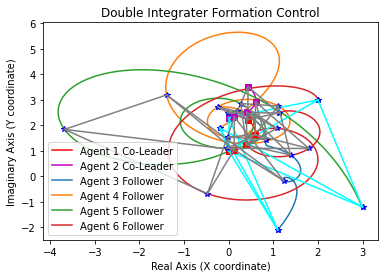

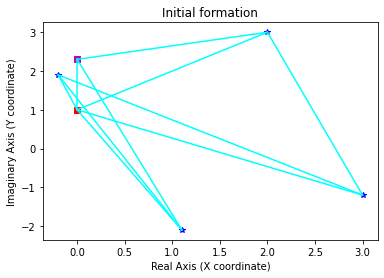

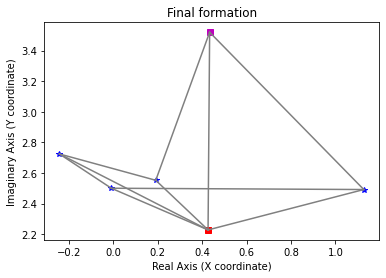

In [179]:
plt.figure(2)
plt = plot_trajectories(sol_dynamics,plt,n)

# Initial positions        
plt = pentagon_plot(sol_dynamics,plt,n,0,'cyan')
# Final positions
plt = pentagon_plot(sol_dynamics,plt,n,-1,'grey')  

plt = pentagon_plot(sol_dynamics,plt,n,(int((1/4)*end/simstep)),"grey")
plt = pentagon_plot(sol_dynamics,plt,n,(int((1/2)*end/simstep)),"grey")
plt = pentagon_plot(sol_dynamics,plt,n,(int((3/4)*end/simstep)),"grey")

plt.title("Double Integrater Formation Control")
plt.xlabel("Real Axis (X coordinate)")
plt.ylabel("Imaginary Axis (Y coordinate)")

plt.show()

#Initial Formation
plt.figure()          
plt = pentagon_plot(sol_dynamics,plt,n,0,'cyan')
plt.title("Initial formation")
plt.show()

#Final Formation
plt.figure()
plt = pentagon_plot(sol_dynamics,plt,n,-1,'grey')
plt.title("Final formation")
plt.show()

In [180]:
#Calculate Inputs -a1 and a2

#Calculate Inputs 
def calculate_inputs_DID(formation,Leader_input,sol,n):
    
    z = sol.y[::2]
    v = sol.y[1::2]
    
    for i,t in enumerate(sol.t):
        at = np.matmul(np.linalg.inv(formation.Hbar),(-np.matmul(np.matmul(formation.D,formation.L),z[:,i])-gamma*np.matmul(formation.Hbar,v[:,i])+np.multiply(formation.eta,Leader_input(sol.t[i]))))
        at = np.reshape(at,(n,1))
        if i==0:
            inputs = at
        else:
            inputs = np.append(inputs,at,axis=1)
    return inputs

DID_inputs = calculate_inputs_DID(pentagon,Leader_acceleration,sol_dynamics,n) 

In [181]:
np.reshape(v_init,(6,1))
vinput_init =np.reshape(np.reshape(v_init,(6,1)).real,(6,))/np.cos(theta_init)
np.shape(vinput_init)
print(v_init)
print(np.cos(theta_init))
vinput_init
np.shape(sol_dynamics.t)

[1.83697020e-17+0.3j        1.41421356e-01+0.14142136j
 2.00000000e-01+0.34641016j 5.65685425e-01+0.56568542j
 4.28626380e-17-0.7j        1.73205081e-01+0.1j       ]
[6.12323400e-17 7.07106781e-01 5.00000000e-01 7.07106781e-01
 6.12323400e-17 8.66025404e-01]


(20000,)

In [182]:
#Calculate Theta and v - Ode solver simualtaneously
#Refer stabilization doc

#Singularity at v= 0

a1=DID_inputs.real
a2=DID_inputs.imag

def v_theta_solver(t,x,n,simstep,a1,a2):
        v = x[::2]
        theta = x[1::2]
        
        index=(int)(t/simstep)
        
        dvdt = a1[:,index]*np.cos(theta)+a2[:,index]*np.sin(theta) 
        dthetadt = (-a1[:,index]*np.sin(theta)+u2[:,index]*np.cos(theta))/v       
       
        dxdt = np.zeros(2*n,dtype=complex)
        dxdt[::2] = dvdt
        dxdt[1::2] = dthetadt
        
        return dxdt
    
theta_init =[np.pi/2,np.pi/4,np.pi/3,np.pi/4,-np.pi/2,np.pi/6]

#vinput_init =np.reshape(np.reshape(v_init,(6,1)).real,(6,))/np.cos(theta_init)

init = np.zeros(2*n,dtype=complex)
init[::2] = vinput_init
init[1::2] = theta_init

sol_v_theta = solve_ivp(v_theta_solver,[sol_dynamics.t[0], sol_dynamics.t[-1]],init,args=(n,simstep,a1,a2),t_eval=sol_dynamics.t)

v = sol_v_theta.y[::2]
theta= sol_v_theta.y[1::2]


#Calculate Actual control inputs - Plug into expression

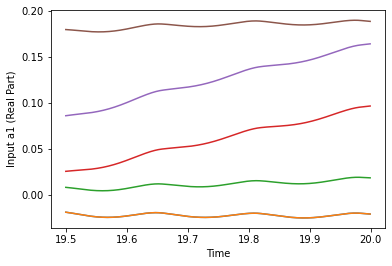

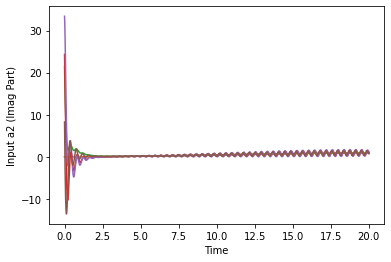

In [185]:
plt.figure()

for i in range(n):
    plt.plot(sol_dynamics.t[19500:20000],DID_inputs[i][19500:20000].real)
    plt.xlabel("Time")
    plt.ylabel("Input a1 (Real Part)")

plt.show()

plt.figure()
for i in range(n):
    plt.plot(sol_dynamics.t[:20000],inputs[i][:20000].imag)
    plt.xlabel("Time")
    plt.ylabel("Input a2 (Imag Part)")
    
plt.show()

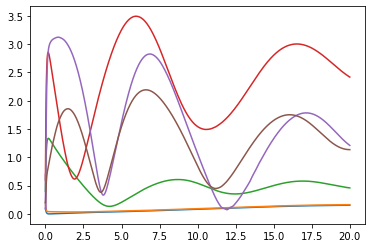

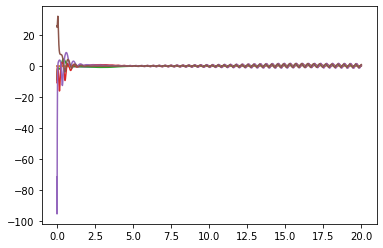

In [144]:
plt.figure()

for i in range(n):
    plt.plot(sol_dynamics.t[:],v[i][:])

plt.show()

plt.figure()

for i in range(n):
    plt.plot(sol_dynamics.t[:],omega[i][:])

plt.show()

In [23]:
# Square Formation 

def square_plot(sol,plt,n,t,linecolor):
    
    if np.shape(sol.y)[0]==2*n:
        k=2
    elif np.shape(sol.y)[0]==n:
        k=1
    
    for i in range(0,k*n,k):
        if i == 0 :
            plt.plot(sol.y[i][t].real,sol.y[i][t].imag,'rs')
        elif i == 1*k:
            plt.plot(sol.y[i][t].real,sol.y[i][t].imag,'ms')
        else:
            plt.plot(sol.y[i][t].real,sol.y[i][t].imag,'b*')    
    
    plt.plot([sol.y[0][t].real,sol.y[1*k][t].real],[sol.y[0][t].imag,sol.y[1*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[0][t].real,sol.y[2*k][t].real],[sol.y[0][t].imag,sol.y[2*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[0][t].real,sol.y[3*k][t].real],[sol.y[0][t].imag,sol.y[3*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[2*k][t].real,sol.y[4*k][t].real],[sol.y[2*k][t].imag,sol.y[4*k][t].imag],'-',color=linecolor)
    plt.plot([sol.y[3*k][t].real,sol.y[4*k][t].real],[sol.y[3*k][t].imag,sol.y[4*k][t].imag],'-',color=linecolor)
        
    plt.xlabel("Real Axis (X coordinate)")
    plt.ylabel("Imaginary Axis (Y coordinate)")
    
    return plt

In [24]:
# Number of agents
n= 5

# Sensing graph input
L = np.zeros((n,n),dtype= complex)

Llf = np.array([[-1,0],[-1j,0],[0,-2j]],dtype = complex)
Lff = np.array([[1+1j,0,-1j],[0,1+1j,-1],[-2*(1-1j),-1*(1+1j),3+1j]],dtype=complex)

L[2:n,0:2] = Llf
L[2:n,2:n] = Lff

# Communication graph input
H = np.zeros((n,n))

Hlf = np.array([[-1/2,0],[-1/2,0],[0,-1/3]])
Hff = np.array([[1,0,-1/2],[0,1,-1/2],[-1/3,-1/3,1]])

H[2:n,0:2] = Hlf
H[2:n,2:n] = Hff

# Stabilization matrix (Important)
D =np.diag([1,1,5,5*np.exp(complex(0,np.pi/10)),np.exp(complex(0,-3*np.pi/4))]) 

square=formation(n,L,H,D)

start  = 0
end = 20
simstep =.001
z_init = [0+1j,0+2.3j,-2.1-2.1j,-2.2+1.9j,+3-1.2j] 

def Leader_v0(t):
    v0_real = 2*t*np.cos([0.1*t])
    v0_imag = 0.5*t*np.sin([0.1*t])
    v0 = 0.2*complex(v0_real,v0_imag)
    return v0

sim_params_square = sim_params_single_int(start,end,simstep,z_init)

sol_kinematics =single_kinematics(square,sim_params_square,Leader_v0)

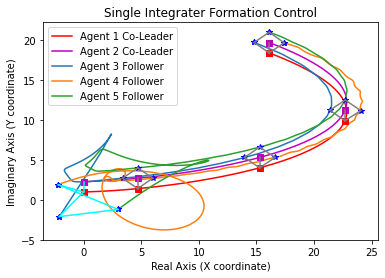

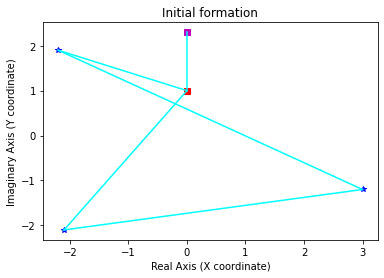

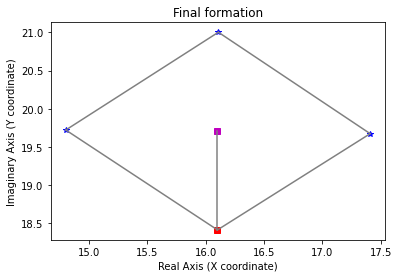

In [25]:
#Simulation Results
plt.figure()

plt = plot_trajectories(sol_kinematics,plt,n)

# Initial positions        
plt = square_plot(sol_kinematics,plt,n,0,"cyan")
# Final positions
plt = square_plot(sol_kinematics,plt,n,-1,"grey")

plt = square_plot(sol_kinematics,plt,n,int((1/4)*(end/simstep)),"grey")
plt = square_plot(sol_kinematics,plt,n,int((1/2)*(end/simstep)),"grey")
plt = square_plot(sol_kinematics,plt,n,int((3/4)*(end/simstep)),"grey")

plt.show()

#Initial Formation
plt.figure()          
plt = square_plot(sol_kinematics,plt,n,0,'cyan')
plt.title("Initial formation")
plt.show()

#Final Formation
plt.figure()
plt = square_plot(sol_kinematics,plt,n,-1,"grey")
plt.title("Final formation")
plt.show()

In [26]:
# sol_kinematics.y[:2,0]
# ut = np.matmul(np.linalg.inv(square.Hbar),(-np.matmul(np.matmul(square.D,square.L),sol_kinematics.y[:,0])+np.multiply(square.eta,Leader_v0(sol_kinematics.t[0]))))
# np.shape(ut)
# ut = np.reshape(ut,(5,1))
# u = np.empty([5,1])

# np.append(ut,u,axis=1) 

In [27]:
# inputs[:,0].imag

In [28]:
inputs = calculate_inputs_SIK(square,Leader_v0,sol_kinematics,n)

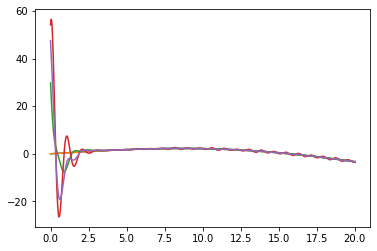

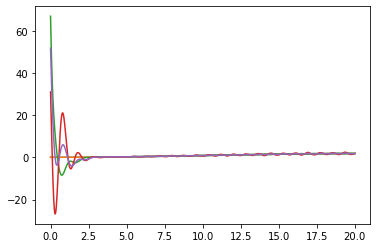

In [29]:
plt.figure()

#plt.plot(sol_kinematics.t,np.ones(np.size(sol_kinematics.t)))
for i in range(n):
    plt.plot(sol_kinematics.t,inputs[i].real)

plt.show()

plt.figure()
for i in range(n):
    plt.plot(sol_kinematics.t,inputs[i].imag)

plt.show()

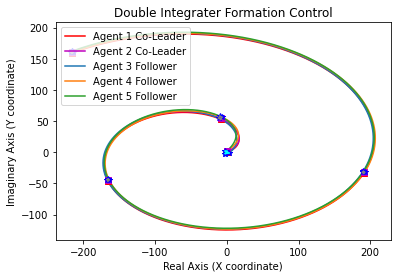

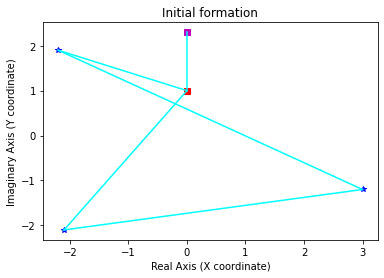

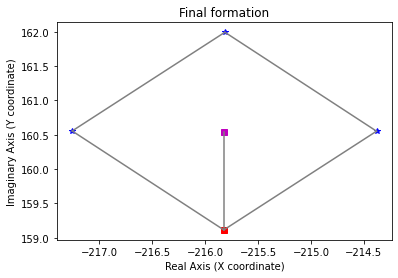

In [30]:
# Input Acceleration for co-leaders 
def Leader_a0(t):
    a0_real = 3*t*np.cos([0.1*t])
    a0_imag = 2*t*np.sin([0.1*t])
    a0 = complex(a0_real,a0_imag)
    return a0

# Stabilization matrix (Important)
D =np.diag([1,1,2*np.exp(complex(0,-np.pi/2)),2*np.exp(complex(0,-np.pi/2)),1]) 

square=formation(n,L,H,D)

#Simulation parameters
start=0
end=100
simstep=.001
gamma = 10
z_init = [0+1j,0+2.3j,-2.1-2.1j,-2.2+1.9j,+3-1.2j] 
v_init = [0+1j,0+2.3j,-2.1-2.1j,-2.2+1.9j,+3-1.2j]

square_sim_params = sim_params_double_int(start,end,simstep,gamma,z_init,v_init)

sol_dynamics =double_dynamics(square,square_sim_params,Leader_a0) 

plt.figure()
plt = plot_trajectories(sol_dynamics,plt,n)

# Initial positions        
plt = square_plot(sol_dynamics,plt,n,0,'cyan')
# Final positions
plt = square_plot(sol_dynamics,plt,n,-1,'grey')  

plt = square_plot(sol_dynamics,plt,n,(int((1/4)*end/simstep)),"grey")
plt = square_plot(sol_dynamics,plt,n,(int((1/2)*end/simstep)),"grey")
plt = square_plot(sol_dynamics,plt,n,(int((3/4)*end/simstep)),"grey")

plt.title("Double Integrater Formation Control")
plt.xlabel("Real Axis (X coordinate)")
plt.ylabel("Imaginary Axis (Y coordinate)")

plt.show()

#Initial Formation
plt.figure()          
plt = square_plot(sol_dynamics,plt,n,0,'cyan')
plt.title("Initial formation")
plt.show()

#Final Formation
plt.figure()
plt = square_plot(sol_dynamics,plt,n,-1,'grey')
plt.title("Final formation")
plt.show()